### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.8.0'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/With and without Mask /dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 616 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/With and without Mask /dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 198 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
fitted_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
20/20 [==============================] - 167s 8s/step - loss: 0.8057 - accuracy: 0.5065 - val_loss: 0.7298 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 5s 253ms/step - loss: 0.6039 - accuracy: 0.6331 - val_loss: 0.5063 - val_accuracy: 0.8535
Epoch 3/25
20/20 [==============================] - 5s 252ms/step - loss: 0.3446 - accuracy: 0.8782 - val_loss: 0.2724 - val_accuracy: 0.9192
Epoch 4/25
20/20 [==============================] - 5s 256ms/step - loss: 0.2338 - accuracy: 0.9172 - val_loss: 0.1906 - val_accuracy: 0.9343
Epoch 5/25
20/20 [==============================] - 5s 257ms/step - loss: 0.1847 - accuracy: 0.9253 - val_loss: 0.2744 - val_accuracy: 0.8939
Epoch 6/25
20/20 [==============================] - 5s 252ms/step - loss: 0.1332 - accuracy: 0.9497 - val_loss: 0.1718 - val_accuracy: 0.9242
Epoch 7/25
20/20 [==============================] - 5s 255ms/step - loss: 0.1122 - accuracy: 0.9659 - val_loss: 0.1202 - val_accuracy: 0.9545
Epoch 8

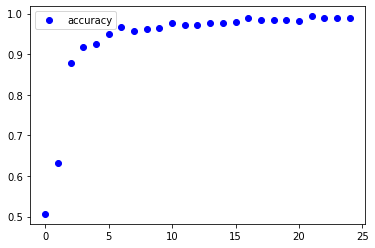

In [17]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')

plt.legend()

## Part 4 - Making a single prediction

In [34]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/MyDrive/Colab Notebooks/CNN/projects/With and without Mask /dataset/testing/10.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Without Mask'
else:
  prediction = 'With Mask'

In [35]:
print(prediction)

Without Mask
